In [1]:
using Plots, Match, Distributions

In [43]:
import Base: +, -, *, length, iterate

struct Vector{T <: Number}
    x::T
    y::T
end

function -(v1::Vector{T}, v2::Vector{T}) where T <: Number
    Vector(v1.x - v2.x, v1.y - v2.y)
end

function +(v1::Vector{T}, v2::Vector{T}) where T <: Number
    Vector(v1.x + v2.x, v1.y + v2.y)
end

function *(v1::Vector{T}, v2::Vector{T}) where T <: Number
    Vector(v1.x * v2.x, v1.y * v2.y)
end

function vec_length(v1::Vector{T})::Float64 where T <: Number
    (Float64(v1.x) ^ 2 + Float64(v1.y) ^ 2) ^ (1/2)
end

function iterate(v1::Vector{T}, state=(v1.x, 0)) where T <: Number
    elem, count = state

    if count == 0
        return (elem, (v1.y, count + 1))
    elseif count == 1
        return (elem, (v1.y, count + 1))
    else
        return nothing
    end
end

function to_tuple(p::Vector{T})::Tuple{T, T} where T <: Number
    (p.x, p.y)
end

function convert(Int64, p::Vector{Float64})::Vector{Int64}
    Vector(Int64(p.x), Int64(p.y))
end

convert (generic function with 2 methods)

In [44]:
vec = Vector(1.0,1.0)
convert(Int64, vec)

Vector{Int64}(1, 1)

### 2.4

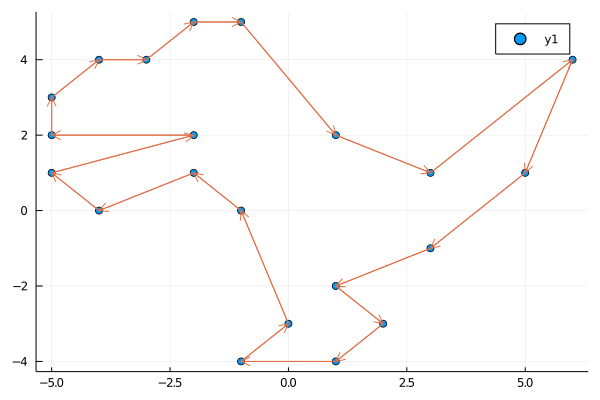

In [3]:
gr()
dino_vectors = [
    Vector(6, 4),
    Vector(3,1),
    Vector(1,2),
    Vector(-1,5),
    Vector(-2,5),
    Vector(-3,4),
    Vector(-4,4),
    Vector(-5,3),
    Vector(-5,2),
    Vector(-2,2),
    Vector(-5,1),
    Vector(-4,0),
    Vector(-2,1),
    Vector(-1,0),
    Vector(0,-3),
    Vector(-1,-4),
    Vector(1,-4),
    Vector(2,-3),
    Vector(1,-2),
    Vector(3,-1),
    Vector(5,1)
]
dino_quivers = [(y - x) for (x, y) in zip(dino_vectors, circshift(dino_vectors, 1))]

dino_tuples = [to_tuple(vec) for vec in dino_vectors]
dino_quiver_tuples = [to_tuple(vec) for vec in dino_quivers]
scatter(dino_tuples)
quiver!(dino_tuples, quiver=dino_quiver_tuples)

### 2.5

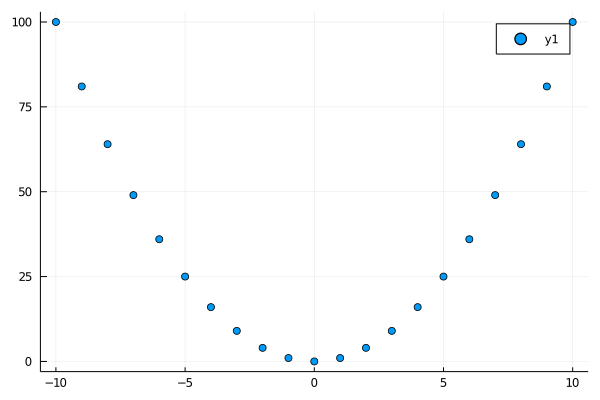

In [4]:
graph = [(x, x^2) for x in -10:10]
scatter(graph)

### 2.7

In [5]:
function add(l::Array{Vector{T}, 1})::Vector{T} where T <: Number
   reduce((x, y) -> x + y, l, init=Vector(0,0)) 
end

add (generic function with 1 method)

In [6]:
add([Vector(1,1), Vector(2,2), Vector(3,3)])

Vector{Int64}(6, 6)

### 2.8

In [7]:
function translate(translation::Vector{T}, vectors::Array{Vector{T}}) where T <: Number
    map(x -> x + translation, vectors)
end

translate (generic function with 1 method)

In [8]:
translate(Vector(1,1), [Vector(0,0), Vector(0,1), Vector(-3,-3)])

3-element Array{Vector{Int64},1}:
 Vector{Int64}(1, 1)
 Vector{Int64}(1, 2)
 Vector{Int64}(-2, -2)

### 2.11

In [9]:
function get_offset(l::Array{Vector{T}}) where T <: Number
    lmin = reduce((p, acc) -> Vector(min(p.x, acc.x), min(p.y, acc.y)), l, init=Vector(0,0))
    lmax = reduce((p, acc) -> Vector(max(p.x, acc.x), max(p.y, acc.y)), l, init=Vector(0,0))
    lmax - lmin
end

p_offset = get_offset(dino_vectors)

Vector{Int64}(11, 9)

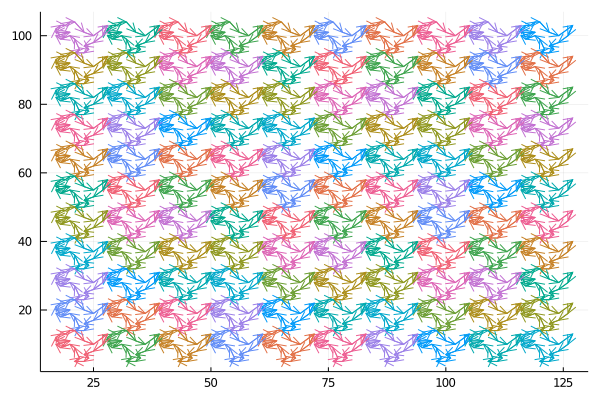

In [10]:
p = scatter()

function add_dinos_to_plot!(x_adj::Int64, y_adj::Int64)
    offset = p_offset * Vector(x_adj + 1, y_adj + 1)
    dino_tuples = [to_tuple(vec) for vec in translate(offset, dino_vectors)]
    dino_quiver_tuples = [to_tuple(vec) for vec in dino_quivers]
    quiver!(p, dino_tuples, quiver=dino_quiver_tuples)
end

function plot_dinos(num_x, num_y, curr_y=num_y)
    @match num_x begin
        0 => display(p)
        x => @match curr_y begin
            0 => ( add_dinos_to_plot!(x, curr_y); plot_dinos(x - 1, num_y, num_y) )
            y => ( add_dinos_to_plot!(x, y); plot_dinos(x, num_y, y-1) )
        end
    end
end
            
plot_dinos(10, 10)

### 2.17

In [11]:
function *(v1::Vector, x::T) where {T <: Number} 
    Vector(v1.x * x, v1.y * x)
end
    
function *(x::T, v1::Vector) where {T <: Number}
    Vector(v1.x * x, v1.y * x)    
end

* (generic function with 497 methods)

### 2.19

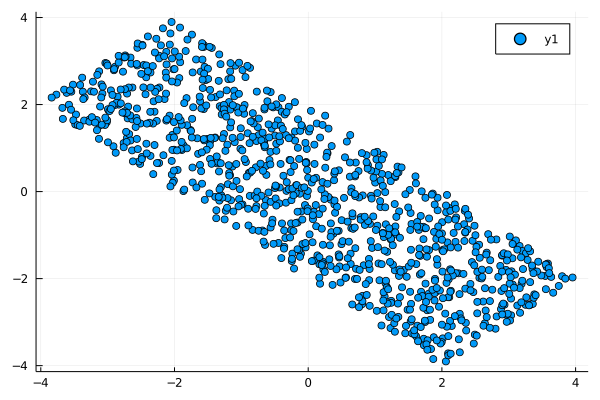

In [12]:
u = Vector(-1, 1)
v = Vector(1,1)
rs = rand(Uniform(-1.0, 1.0), 1000) .* 3
ss = rand(Uniform(-1.0, 1.0), 1000)

all_Vectors = [u * r for r in rs] .+ [v * s for s in ss]
scatter([to_tuple(pt) for pt in all_Vectors])

### 2.25

In [13]:
function distance(v1::Vector{T}, v2::Vector{T})::Float64 where T <: Number
    vec_length(v1 - v2)
end

distance (generic function with 1 method)

In [14]:
distance(Vector(1,1), Vector(2,2))

1.4142135623730951

### 2.26

In [15]:
u = Vector(1,-1)

function find_distance(u::Vector{Int64}, dist::Float64, curr=u, search_range=0:25)
    x_from, x_to = u.x - floor(Int, dist), u.x + ceil(Int, dist)
    y_from, y_to = u.y - floor(Int, dist), u.y + ceil(Int, dist)
    for x in x_from:x_to
        for y in y_from:y_to
            if (y >= 0 && x > y && distance(u, Vector(x, y))==dist)
                return Vector(x,y)
            end
        end
    end
    return nothing
end

find_distance(u, 13.0)

Vector{Int64}(13, 4)

### 2.27

In [16]:
vec_length(Vector(-1.34, 2.68))

2.9963310898497184

### 2.32

In [17]:
hor = (3.0^(1.0/2.0))/2.0
ver = 1.0/2.0
hyp = 1.0
@assert hyp == (hor^2.0 + ver^2.0)^(1.0/2.0) 

println("sin is $(sind(30))")
println("cos is $(cosd(30))")
println("tan is $(tand(30))")

sin is 0.5
cos is 0.8660254037844386
tan is 0.5773502691896258


### 2.35

In [18]:
deg = 116.57
rad = deg2rad(deg)
println("Tan is $(tan(rad))")


Tan is -1.9995682083189954


### 2.36



In [19]:
val = 10 * π / 6
println("VAL $val")
println("SIN $(sin(val))")
println("COS $(cos(val))")


VAL 5.235987755982989
SIN -0.8660254037844386
COS 0.5000000000000001


### 2.37

In [29]:
struct PolarVector
    length::Float64
    angle::Float64
end

function rotate(p::PolarVector, rad::Float64)::PolarVector
    PolarVector(p.length, p.angle + rad)
end

function polar2cartesian(p::PolarVector)::Vector{Float64}
    Vector(p.length*cos(p.angle), p.length*sin(p.angle))
end

function cartesian2polar(p::Vector{T})::PolarVector where T <: Number
    angle = atan(p.y, p.x)
    length = (p.y^2 + p.x^2)^(1/2)
    PolarVector(length, angle)
end

cartesian2polar (generic function with 1 method)

In [30]:
cartesian2polar(Vector(1,1))

PolarVector(1.4142135623730951, 0.7853981633974483)

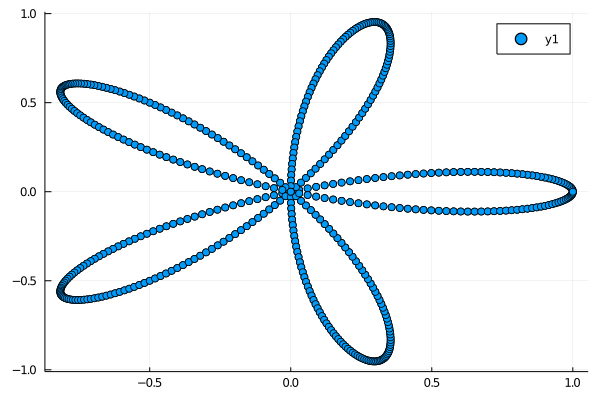

In [31]:
polar_vecs = [PolarVector(cos(x*π/100), 2*x*π/1000) for x in 0:1000]
vecs = [polar2cartesian(pvec) for pvec in polar_vecs]
vec_tuples = [to_tuple(vec) for vec in vecs]
scatter(vec_tuples)

### 2.38

In [32]:
rad = 2.1585
println("angle in degrees $(rad2deg(rad))")
len = (2^2 + 3^2)^(1/2)
actual = polar2cartesian(PolarVector(len, rad))
println("Actual $actual")
desired = Vector(-2, 3)

angle in degrees 123.6729400789882
Actual Vector{Float64}(-1.9991031196266147, 3.0005977266370003)


Vector{Int64}(-2, 3)

### 2.41

In [33]:
mouth = dino_vectors[9:11]
println(mouth)
mouth_angle = atand(1/3)

Vector{Int64}[Vector{Int64}(-5, 2), Vector{Int64}(-2, 2), Vector{Int64}(-5, 1)]


18.43494882292201

In [34]:
tail = circshift(dino_vectors, 1)[1:3]
println(tail)

Vector{Int64}[Vector{Int64}(5, 1), Vector{Int64}(6, 4), Vector{Int64}(3, 1)]


### 2.42

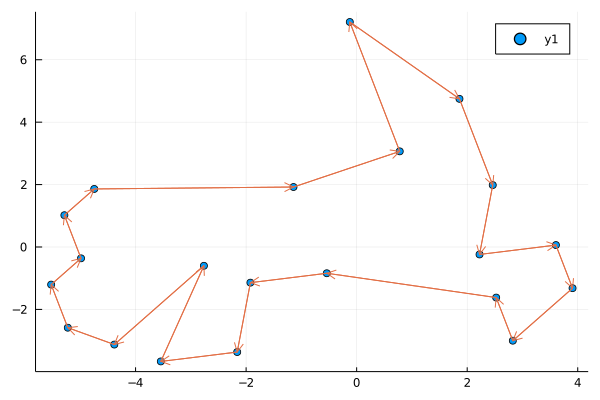

In [46]:
function rotate(vectors::Array{Vector{Int64}}, angle::Float64)::Array{Vector{Float64}}
    as_polar = map(cartesian2polar, vectors)
    rotated = [rotate(vec, angle) for vec in as_polar]
    map(polar2cartesian, rotated)
end

rotated_dino = rotate(dino_vectors, 1.0)
rotated_dino_quivers = [(y - x) for (x, y) in zip(rotated_dino, circshift(rotated_dino, 1))]
rotated_dino_tuples = [to_tuple(vec) for vec in rotated_dino]
rotated_dino_quiver_tuples = [to_tuple(vec) for vec in rotated_dino_quivers]
scatter(rotated_dino_tuples)
quiver!(rotated_dino_tuples, quiver=rotated_dino_quiver_tuples)